<a href="https://colab.research.google.com/github/ScriptSherpa/AI-and-Ml-journey/blob/main/Apriori_The_Bread_Basket%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv("/content/bread basket.csv")

In [4]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

<ipython-input-7-9ad2716163d6>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [8]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [9]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [10]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)


In [11]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [12]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [13]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


# Data Visualization¶

<ipython-input-14-fa3b07aff17c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')


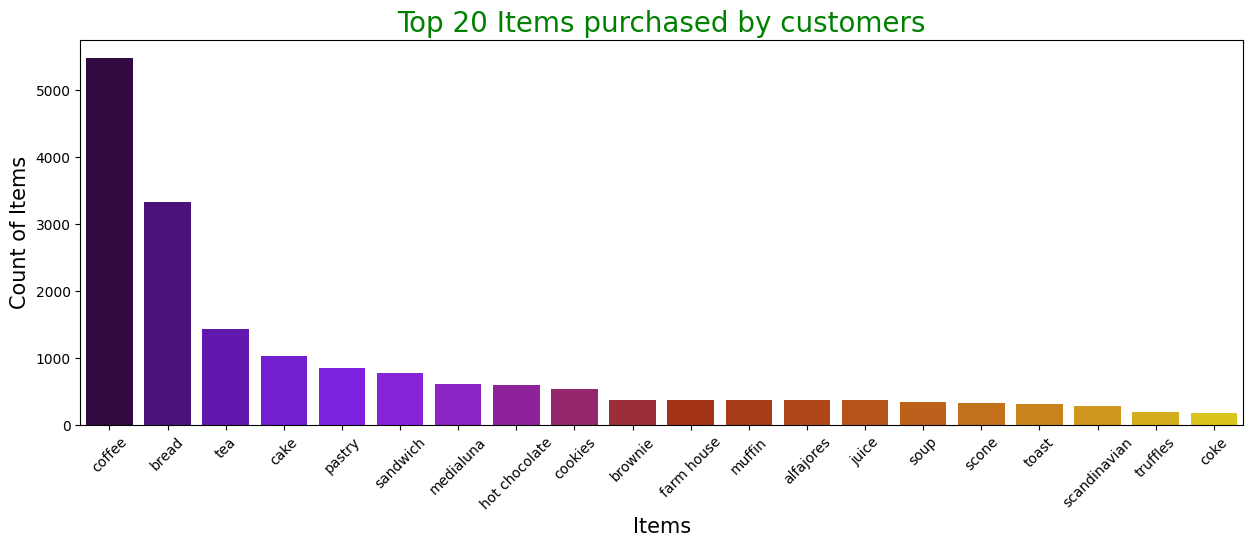

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [15]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

ValueError: Length of values (12) does not match length of index (7)

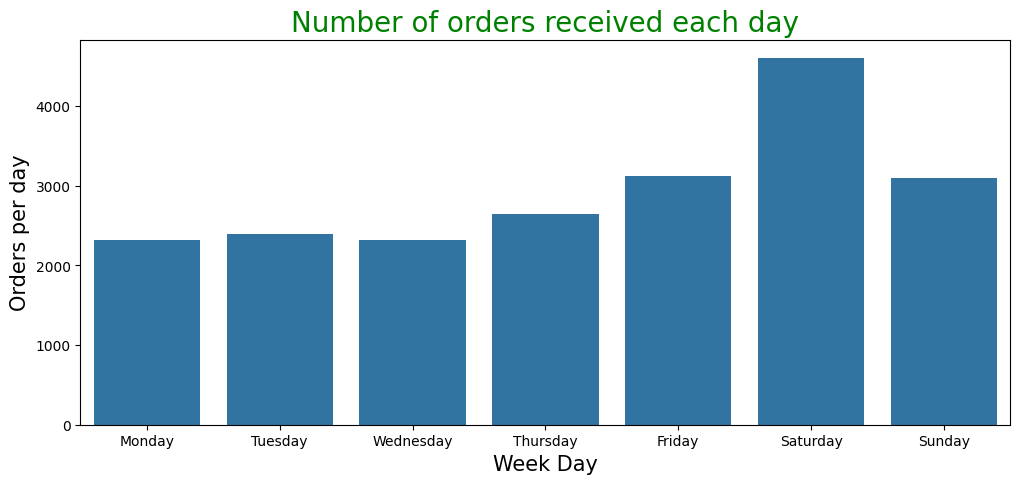

In [16]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

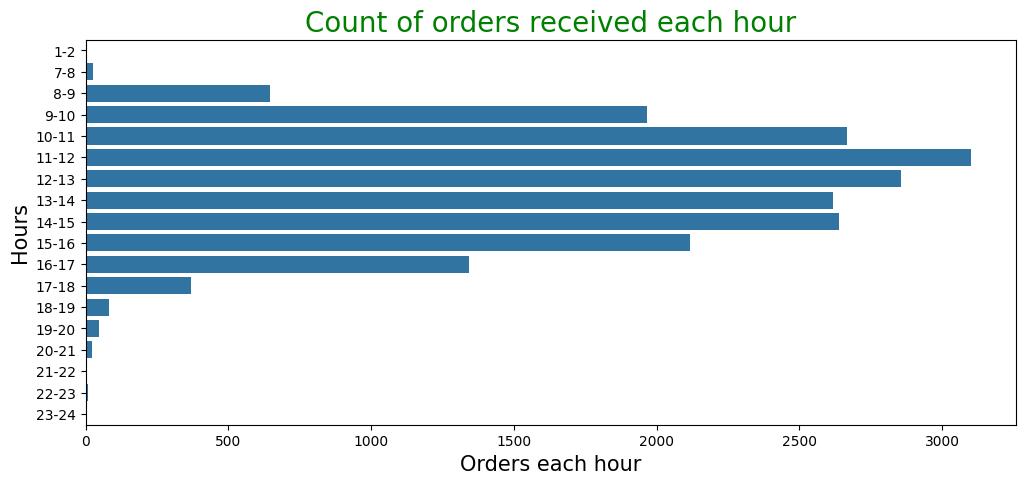

In [17]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

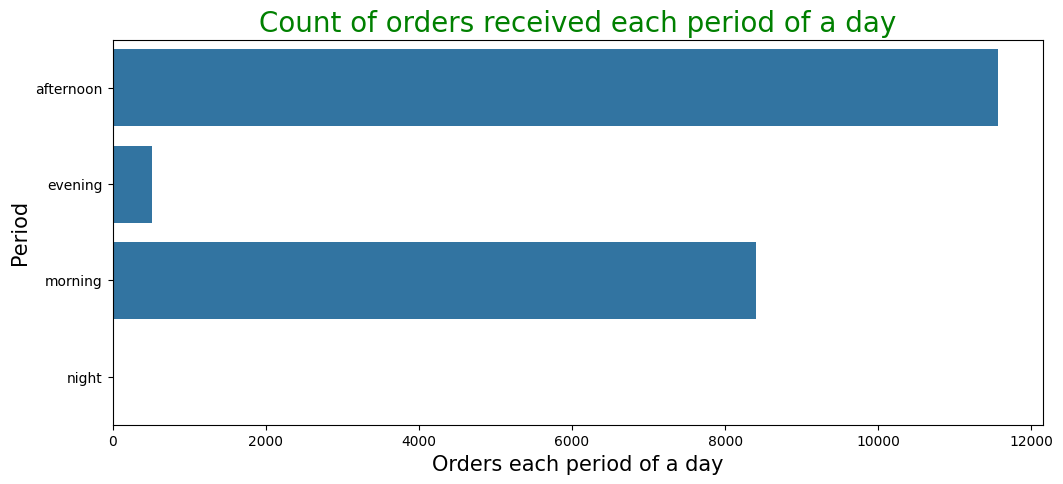

In [18]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [19]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-11-05,275,Saturday
275,2016-11-12,221,Saturday
496,2016-11-19,209,Saturday
705,2017-01-28,237,Saturday
942,2017-02-04,292,Saturday
1234,2017-02-18,227,Saturday
1461,2017-03-04,257,Saturday
1718,2017-03-11,203,Saturday
1921,2017-03-25,246,Saturday
2167,2017-04-08,205,Saturday


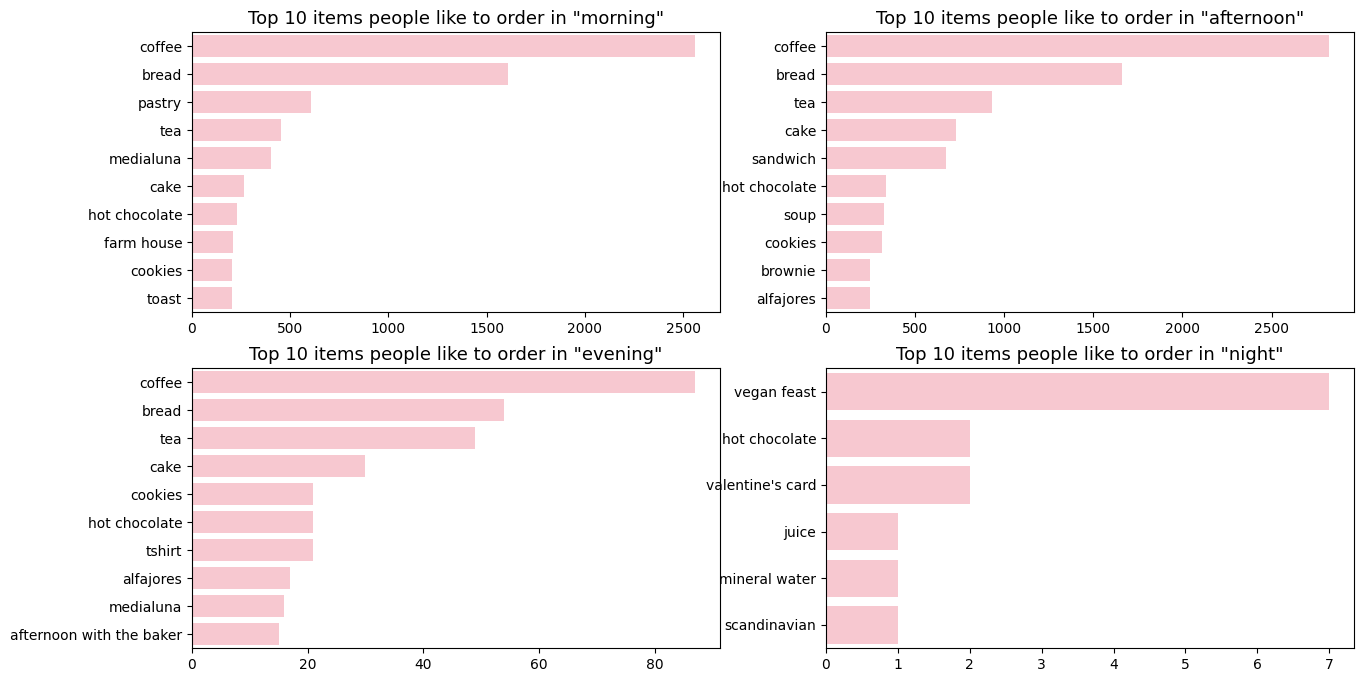

In [20]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

### Apriori Algorithm

In [21]:
from mlxtend.frequent_patterns import association_rules, apriori

In [22]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [24]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

<ipython-input-25-c046333fee30>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_basket_sets = my_basket.applymap(encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(coffee, bread, pastry)"


In [27]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [28]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


# Data Reading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations


In [ ]:
## Specify the input file here
#File needs to be a **csv** of the following format:

###
'''
item1, item2, item3, ... so on
 , t, ...
t, t, t,...
t, t, ...
... so on...'''

'\nitem1, item2, item3, ... so on\n , t, ...\nt, t, t,...\nt, t, ...\n... so on...'

In [ ]:
df = pd.read_csv("/content/test1.csv", low_memory=False)


In [ ]:
df.head()

,handphone,laptop,charger,powerbank,tablet
0,t,t,NaN,NaN,NaN
1,t,t,t,NaN,NaN
2,t,t,t,t,NaN
3,t,t,NaN,NaN,t
4,t,NaN,t,NaN,t


Indexing each item from the header of the data file.

In [ ]:
item_list = list(df.columns)
item_dict = dict()

In [ ]:
for i, item in enumerate(item_list):
    item_dict[item] = i + 1


In [ ]:
item_list = list(df.columns)
item_dict = dict()

for i, item in enumerate(item_list):
    item_dict[item] = i + 1

item_dict

{'handphone': 1, 'laptop': 2, 'charger': 3, 'powerbank': 4, 'tablet': 5}

Extracting the transactions from the data.


In [ ]:
transactions = list()

for i, row in df.iterrows():
    transaction = set()

    for item in item_dict:
        if row[item] == 't':
            transaction.add(item_dict[item])
    transactions.append(transaction)


In [ ]:
## Utility Functions


In [ ]:
##**get_support** function evaluates the support value for a set given all the transactions.


In [ ]:
def get_support(transactions, item_set):
    match_count = 0
    for transaction in transactions:
        if item_set.issubset(transaction):
            match_count += 1

    return float(match_count/len(transactions))

In [ ]:
def self_join(frequent_item_sets_per_level, level):
    current_level_candidates = list()
    last_level_items = frequent_item_sets_per_level[level - 1]

    if len(last_level_items) == 0:
        return current_level_candidates

    for i in range(len(last_level_items)):
        for j in range(i+1, len(last_level_items)):
            itemset_i = last_level_items[i][0]
            itemset_j = last_level_items[j][0]
            union_set = itemset_i.union(itemset_j)

            if union_set not in current_level_candidates and len(union_set) == level:
                current_level_candidates.append(union_set)

    return current_level_candidates


In [ ]:
def get_single_drop_subsets(item_set):
    single_drop_subsets = list()
    for item in item_set:
        temp = item_set.copy()
        temp.remove(item)
        single_drop_subsets.append(temp)

    return single_drop_subsets

def is_valid_set(item_set, prev_level_sets):
    single_drop_subsets = get_single_drop_subsets(item_set)

    for single_drop_set in single_drop_subsets:
        if single_drop_set not in prev_level_sets:
            return False
    return True

def pruning(frequent_item_sets_per_level, level, candidate_set):
    post_pruning_set = list()
    if len(candidate_set) == 0:
        return post_pruning_set

    prev_level_sets = list()
    for item_set, _ in frequent_item_sets_per_level[level - 1]:
        prev_level_sets.append(item_set)

    for item_set in candidate_set:
        if is_valid_set(item_set, prev_level_sets):
            post_pruning_set.append(item_set)

    return post_pruning_set

In [ ]:
## Apriori Algorithm


In [ ]:
from collections import defaultdict

def apriori(min_support):
    frequent_item_sets_per_level = defaultdict(list)
    print("level : 1", end = " ")

    for item in range(1, len(item_list) + 1):
        support = get_support(transactions, {item})
        if support >= min_support:
            frequent_item_sets_per_level[1].append(({item}, support))

    for level in range(2, len(item_list) + 1):
        print(level, end = " ")
        current_level_candidates = self_join(frequent_item_sets_per_level, level)

        post_pruning_candidates = pruning(frequent_item_sets_per_level, level, current_level_candidates)
        if len(post_pruning_candidates) == 0:
            break

        for item_set in post_pruning_candidates:
            support = get_support(transactions, item_set)
            if support >= min_support:
                frequent_item_sets_per_level[level].append((item_set, support))

    return frequent_item_sets_per_level

In [ ]:
### Specify the **minimum support** value here


In [ ]:
min_support = 0.005
frequent_item_sets_per_level = apriori(min_support)

level : 1 2 3 4 5 

In [ ]:

for level in frequent_item_sets_per_level:
    print(len(frequent_item_sets_per_level[level]))

5
10
7
2


In [ ]:
for level in frequent_item_sets_per_level:
    print(frequent_item_sets_per_level[level])

[({1}, 0.8), ({2}, 0.6), ({3}, 0.6), ({4}, 0.4), ({5}, 0.4)]
[({1, 2}, 0.5), ({1, 3}, 0.5), ({1, 4}, 0.2), ({1, 5}, 0.3), ({2, 3}, 0.4), ({2, 4}, 0.2), ({2, 5}, 0.2), ({3, 4}, 0.2), ({3, 5}, 0.2), ({4, 5}, 0.1)]
[({1, 2, 3}, 0.3), ({1, 2, 4}, 0.1), ({1, 2, 5}, 0.2), ({1, 3, 4}, 0.1), ({1, 3, 5}, 0.2), ({2, 3, 4}, 0.2), ({2, 3, 5}, 0.1)]
[({1, 2, 3, 4}, 0.1), ({1, 2, 3, 5}, 0.1)]


In [ ]:
## Generating Association Rules

#Prepare input for calculating association rules: Create a dictionary of each frequent itemset against its support value.

In [ ]:
item_support_dict = dict()
item_list = list()

key_list = list(item_dict.keys())
val_list = list(item_dict.values())

for level in frequent_item_sets_per_level:
    for set_support_pair in frequent_item_sets_per_level[level]:
        for i in set_support_pair[0]:
            item_list.append(key_list[val_list.index(i)])
        item_support_dict[frozenset(item_list)] = set_support_pair[1]
        item_list = list()


In [ ]:
item_support_dict


{frozenset({'handphone'}): 0.8,
 frozenset({'laptop'}): 0.6,
 frozenset({'charger'}): 0.6,
 frozenset({'powerbank'}): 0.4,
 frozenset({'tablet'}): 0.4,
 frozenset({'handphone', 'laptop'}): 0.5,
 frozenset({'charger', 'handphone'}): 0.5,
 frozenset({'handphone', 'powerbank'}): 0.2,
 frozenset({'handphone', 'tablet'}): 0.3,
 frozenset({'charger', 'laptop'}): 0.4,
 frozenset({'laptop', 'powerbank'}): 0.2,
 frozenset({'laptop', 'tablet'}): 0.2,
 frozenset({'charger', 'powerbank'}): 0.2,
 frozenset({'charger', 'tablet'}): 0.2,
 frozenset({'powerbank', 'tablet'}): 0.1,
 frozenset({'charger', 'handphone', 'laptop'}): 0.3,
 frozenset({'handphone', 'laptop', 'powerbank'}): 0.1,
 frozenset({'handphone', 'laptop', 'tablet'}): 0.2,
 frozenset({'charger', 'handphone', 'powerbank'}): 0.1,
 frozenset({'charger', 'handphone', 'tablet'}): 0.2,
 frozenset({'charger', 'laptop', 'powerbank'}): 0.2,
 frozenset({'charger', 'laptop', 'tablet'}): 0.1,
 frozenset({'charger', 'handphone', 'laptop', 'powerbank'}

### Utility Function

**find_subset** finds all the subsets of the given itemset.

In [ ]:
def find_subset(item, item_length):
    combs = []
    for i in range(1, item_length + 1):
        combs.append(list(combinations(item, i)))

    subsets = []
    for comb in combs:
        for elt in comb:
            subsets.append(elt)

    return subsets

**association_rules** generates the association rules in accordance with the given *minimum confidence* value and the provided dictionary of itemsets against their support values. For itemsets of more than one element, it first finds all their subsets. For every subset A, it calculates the set B = itemset-A. If B is not empty, the confidence of B is calculated. If this value is more than *minimum confidence* value, the rule *A->B* is added to the list.


In [ ]:
def association_rules(min_confidence, support_dict):
    rules = list()
    for item, support in support_dict.items():
        item_length = len(item)

        if item_length > 1:
            subsets = find_subset(item, item_length)

            for A in subsets:
                B = item.difference(A)

                if B:
                    A = frozenset(A)

                    AB = A | B

                    confidence = support_dict[AB] / support_dict[A]
                    if confidence >= min_confidence:
                        rules.append((A, B, confidence))

    return rules

In [ ]:
### Specify Minimum confidence value here


In [ ]:
association_rules = association_rules(min_confidence = 0.6, support_dict = item_support_dict)


In [ ]:
### Printing the output in the required format


In [ ]:
### Specify Minimum confidence value here

min_confidence = 0.6
rules = association_rules(min_confidence = min_confidence, support_dict = item_support_dict) #assign output of association_rules function to variable rules

### Printing the output in the required format

print("Number of rules: ", len(rules), "\n") #use variable rules here instead of association_rules

for rule in rules: #use variable rules here instead of association_rules
    print('{0} -> {1} <confidence: {2}>'.format(set(rule[0]), set(rule[1]), rule[2]))

Number of rules:  19 

{'handphone'} -> {'laptop'} <confidence: 0.625>
{'laptop'} -> {'handphone'} <confidence: 0.8333333333333334>
{'handphone'} -> {'charger'} <confidence: 0.625>
{'charger'} -> {'handphone'} <confidence: 0.8333333333333334>
{'tablet'} -> {'handphone'} <confidence: 0.7499999999999999>
{'charger'} -> {'laptop'} <confidence: 0.6666666666666667>
{'laptop'} -> {'charger'} <confidence: 0.6666666666666667>
{'handphone', 'charger'} -> {'laptop'} <confidence: 0.6>
{'handphone', 'laptop'} -> {'charger'} <confidence: 0.6>
{'charger', 'laptop'} -> {'handphone'} <confidence: 0.7499999999999999>
{'handphone', 'tablet'} -> {'laptop'} <confidence: 0.6666666666666667>
{'laptop', 'tablet'} -> {'handphone'} <confidence: 1.0>
{'handphone', 'tablet'} -> {'charger'} <confidence: 0.6666666666666667>
{'charger', 'tablet'} -> {'handphone'} <confidence: 1.0>
{'powerbank', 'charger'} -> {'laptop'} <confidence: 1.0>
{'powerbank', 'laptop'} -> {'charger'} <confidence: 1.0>
{'handphone', 'charger